In [1]:
%pylab inline

import os
import unicodedata
import string
import re
import random
import scipy.stats
import importlib
from sklearn import metrics
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore') 

import LiB
model = LiB.model

%store -r geco_mono
%store -r geco_l1
%store -r line_ends_english
%store -r line_ends_dutch

%store -r tokens_l1_all
%store -r sents_l1_all
%store -r tokens_mono_all
%store -r sents_mono_all

%store -r sents_with_line_ends_without_repeat_nl
%store -r sents_with_line_ends_without_repeat_en

geco_res = {
    'L1': (geco_l1,tokens_l1_all,sents_l1_all),
    'mono': (geco_mono,tokens_mono_all,sents_mono_all)
    }

In [ ]:
%store -r corpus_coca
%store -r corpus_sonar

In [3]:
importlib.reload(LiB)
model = LiB.model

'Define the train/test set'
corpus_train = sents_with_line_ends_without_repeat_en
corpus_test = sents_with_line_ends_without_repeat_en
'New and init a memory'
m_geco_en = model(corpus_train, corpus_test, lexicon_in=0.25, lexicon_out=0.0001, update_rate=0.2, life=3)

'RUN!!!'
m_geco_en.logs['note'] = 0
for epoch_id in range(0,10001):
    m_geco_en.run(epoch_id, article_length=200, test_interval=100);
    if epoch_id > 1 and epoch_id % 100 == 0 and \
            m_geco_en.logs['eval_index'][-1] > m_geco_en.logs['eval_index'][-2]:
        break
            
f1 = m_geco_en.predict_eye_fixations(geco_res['mono'], show_length=True);
print(f"Time cost for training: {sum(m_geco_en.logs['time_cost'])//60}min{sum(m_geco_en.logs['time_cost'])%60}s")

0	  MemLength: 540 3.4	  ChunkLength: 2.15	  EvalIndex: 4.213

100	  MemLength: 3677 6.3	  ChunkLength: 4.67	  EvalIndex: 2.535 Change:39.8%

200	  MemLength: 4412 6.8	  ChunkLength: 5.02	  EvalIndex: 2.411 Change:4.9%

300	  MemLength: 5108 7.1	  ChunkLength: 5.28	  EvalIndex: 2.333 Change:3.2%

400	  MemLength: 5640 7.4	  ChunkLength: 5.45	  EvalIndex: 2.287 Change:2.0%

500	  MemLength: 6229 7.7	  ChunkLength: 5.62	  EvalIndex: 2.243 Change:2.0%

600	  MemLength: 6470 7.8	  ChunkLength: 5.70	  EvalIndex: 2.219 Change:1.1%

700	  MemLength: 6737 8.0	  ChunkLength: 5.79	  EvalIndex: 2.197 Change:1.0%

800	  MemLength: 7227 8.1	  ChunkLength: 5.91	  EvalIndex: 2.170 Change:1.2%

900	  MemLength: 7451 8.2	  ChunkLength: 5.98	  EvalIndex: 2.150 Change:0.9%

1000	  MemLength: 7862 8.5	  ChunkLength: 6.07	  EvalIndex: 2.133 Change:0.8%

1100	  MemLength: 8077 8.4	  ChunkLength: 6.11	  EvalIndex: 2.125 Change:0.4%

1200	  MemLength: 8298 8.6	  ChunkLength: 6.17	  EvalIndex: 2.109 Change:0.7

In [5]:
importlib.reload(LiB)
model = LiB.model

'Define the train/test set'
corpus_train = sents_with_line_ends_without_repeat_nl
corpus_test = sents_with_line_ends_without_repeat_nl
'New and init a memory'
m_geco_nl = model(corpus_train, corpus_test, lexicon_in=0.25, lexicon_out=0.0001, update_rate=0.2, life=3)
m_geco_nl.max_len = None

'RUN!!!'
m_geco_nl.logs['note'] = 0
for epoch_id in range(0,10001):
    m_geco_nl.run(epoch_id, article_length=200, test_interval=100);
    if epoch_id > 1 and epoch_id % 100 == 0:
        if m_geco_nl.logs['eval_index'][-1] > m_geco_nl.logs['eval_index'][-2]:
            break
            
f1 = m_geco_nl.predict_eye_fixations(geco_res['L1'], show_length=True);
print(f"Time cost for training: {sum(m_geco_nl.logs['time_cost'])//60}min{sum(m_geco_nl.logs['time_cost'])%60}s")

0	  MemLength: 605 3.8	  ChunkLength: 2.36	  EvalIndex: 3.909

100	  MemLength: 4020 6.8	  ChunkLength: 4.87	  EvalIndex: 2.461 Change:37.1%

200	  MemLength: 5057 7.2	  ChunkLength: 5.26	  EvalIndex: 2.338 Change:5.0%

300	  MemLength: 5503 7.5	  ChunkLength: 5.49	  EvalIndex: 2.262 Change:3.3%

400	  MemLength: 6046 7.8	  ChunkLength: 5.67	  EvalIndex: 2.214 Change:2.1%

500	  MemLength: 6611 8.2	  ChunkLength: 5.83	  EvalIndex: 2.178 Change:1.6%

600	  MemLength: 7114 8.4	  ChunkLength: 5.94	  EvalIndex: 2.156 Change:1.0%

700	  MemLength: 7359 8.5	  ChunkLength: 6.02	  EvalIndex: 2.134 Change:1.0%

800	  MemLength: 7715 8.7	  ChunkLength: 6.11	  EvalIndex: 2.114 Change:0.9%

900	  MemLength: 8088 8.8	  ChunkLength: 6.19	  EvalIndex: 2.098 Change:0.8%

1000	  MemLength: 8400 8.9	  ChunkLength: 6.26	  EvalIndex: 2.081 Change:0.8%

1100	  MemLength: 8800 9.1	  ChunkLength: 6.34	  EvalIndex: 2.066 Change:0.8%

1200	  MemLength: 8916 9.1	  ChunkLength: 6.37	  EvalIndex: 2.059 Change:0.3

In [7]:
# Training on COCA
importlib.reload(LiB)
model = LiB.model

'Define the train/test set'
corpus_test = sents_with_line_ends_without_repeat_en

'New and init a memory'
m_geco_coca = model(corpus_coca[0], corpus_test, lexicon_in=0.25, lexicon_out=0.0001, update_rate=0.2, life=3)
m_geco_coca.max_len = None
interval = 1000
m_geco_coca.logs['eval_index'] = [10]

'RUN!!!'
corpus_train = [(art_id, i) for art_id in range(len(corpus_coca)) for i in range(0,len(corpus_coca[art_id]),200)]
rag = list(range(0,len(corpus_train)))
random.shuffle(rag)
for epoch_id in range(len(rag)):
    art_id, i = corpus_train[epoch_id]
    m_geco_coca.corpus_train = corpus_coca[art_id][i:i+200]
    m_geco_coca.run(epoch_id, article_length=None, test_interval=interval);
    
f1 = m_geco_coca.predict_eye_fixations(geco_res['mono'], show_length=True);
print(sum(m_geco_coca.logs['time_cost']),sum(m_geco_coca.logs['time_cost'])//60,sum(m_geco_coca.logs['time_cost'])%60) 

0	  MemLength: 1063 4.1	  ChunkLength: 2.37	  B: 14524 1053011 1067535 2.881

1000	  MemLength: 30273 9.7	  ChunkLength: 4.78	  B: 158989 665686 824675 1.809 26.6

2000	  MemLength: 41460 9.9	  ChunkLength: 5.14	  B: 197964 635900 833864 1.717 4.0

3000	  MemLength: 50413 10.0	  ChunkLength: 5.39	  B: 227508 616512 844021 1.654 3.0

4000	  MemLength: 56828 9.9	  ChunkLength: 5.65	  B: 252706 596670 849375 1.592 3.5

5000	  MemLength: 65192 10.0	  ChunkLength: 5.74	  B: 261730 589368 851097 1.571 0.3

6000	  MemLength: 71336 10.0	  ChunkLength: 5.79	  B: 268021 586112 854133 1.563 -0.0

7000	  MemLength: 77213 10.1	  ChunkLength: 5.84	  B: 272702 580930 853632 1.550 0.2

8000	  MemLength: 83199 10.2	  ChunkLength: 5.91	  B: 281360 576032 857392 1.534 0.5

9000	  MemLength: 85876 10.2	  ChunkLength: 6.02	  B: 287359 568305 855664 1.510 1.5

10000	  MemLength: 89326 10.3	  ChunkLength: 6.08	  B: 292763 564031 856794 1.496 0.7

11000	  MemLength: 95898 10.5	  ChunkLength: 6.11	  B: 298013 

In [10]:
# Training on SoNaR
importlib.reload(LiB)
model = LiB.model

'Define the train/test set'
corpus_test = sents_with_line_ends_without_repeat_nl

'New and init a memory'
m_geco_sonar = model(corpus_sonar[0], corpus_test, lexicon_in=0.25, lexicon_out=0.0001, update_rate=0.2, life=3)
m_geco_sonar.max_len = None
interval = 1000
m_geco_sonar.logs['eval_index'] = [10]

'RUN!!!'
corpus_train = [(art_id, i) for art_id in range(len(corpus_sonar)) for i in range(0,len(corpus_sonar[art_id]),200)]
rag = list(range(0,len(corpus_train)))
random.shuffle(rag)
for epoch_id in range(len(rag)):
    art_id, i = corpus_train[epoch_id]
    m_geco_sonar.corpus_train = corpus_sonar[art_id][i:i+200]
    m_geco_sonar.run(epoch_id, article_length=None, test_interval=interval);
    
f1 = m_geco_sonar.predict_eye_fixations(geco_res['L1'], show_length=True);
print(sum(m_geco_sonar.logs['time_cost']),sum(m_geco_sonar.logs['time_cost'])//60,sum(m_geco_sonar.logs['time_cost'])%60) 

[Length] Word 5.60 Pred 6.91 First 8.19 Total 7.03	[F1] First 53.72 38.68	Total 46.89 29.76

4325.843949556351 72.0 5.843949556350708


# CBL

In [27]:
from itertools import accumulate,groupby
def CBL_predict_eye_fixations(shallow_parses_for_inference, corpus, adjust=None, target='WORD_FIRST_RUN_FIXATION_COUNT', return_fixations=False):
    cbl_result = dict([(' '.join(l) + ' ').replace('|| ',''), 
                       (' '.join(l) + ' ').split('|| ')] 
                          for l in shallow_parses_for_inference)
    
    fixations0_ = []
    fixations1_ = []
    tokens_ = []
    len0_ = []
    len1_ = []
    unit_len_model = []

    for geco,tokens,sents in zip(*corpus): # corpus: sentences_x,tokens_x_all,sents_x_all
        jump = 0
        chunks = []
        sent_idx = 0
        while sent_idx < len(sents):
            if sents[sent_idx] in cbl_result:
                chunks.extend(cbl_result[sents[sent_idx]])
                sent_idx += 1
            else:
                jump = 1
                break
        if jump == 1:
            continue
        
        len0_.extend([len(c) for c in tokens])
        len1_.extend([len(c) for c in chunks])
        chunk_pos = list(accumulate([len(c) for c in chunks]))

        chunk_pos_0 = set(accumulate([len(c) for c in tokens]))
        chunk_pos_0, chunk_pos = [0] + sorted(chunk_pos_0),[0] + sorted(chunk_pos)
        
        unit_len_model.extend([n-m for m,n in zip(chunk_pos[:-1],chunk_pos[1:])])

        fix_pos = [(n+m)/2 for m,n in zip(chunk_pos[:-1],chunk_pos[1:])]

        fix_pos = np.array(fix_pos)
        fixations1 = [len(fix_pos[(a<=fix_pos)&(fix_pos<b)])
                        for a,b in zip(chunk_pos_0[:-1],chunk_pos_0[1:])]

        fixations1_.extend(fixations1)

        fixations0 = [0 if i=='.' else int(i) for i in geco[target]]
        fixations0_.extend(fixations0)
        
        tokens_.extend(tokens)
        
    # print(f'len {sum([len(i) for i in tokens_])/sum(fixations1_):.3f} {sum([len(i) for i in tokens_])/sum(fixations0_):.3f}')
    print(f'Model_len_AVG {np.mean(unit_len_model):.3f}')
    print(f'Model_len_SE {np.std(unit_len_model)/(len(unit_len_model)**0.5):.3f} CI {2.575*np.std(unit_len_model)/(len(unit_len_model)**0.5):.3f}')
        
    if return_fixations:
        return fixations0_, fixations1_, unit_len_model
    else:
        
        f1 = metrics.f1_score(fixations0_, fixations1_, average='weighted')
        f1_ = metrics.f1_score(fixations0_, [1 for i in fixations1_], average='weighted')
        print(f'f1 {f1*100:.2f} {f1_*100:.2f}')
        return f1, f1_

In [22]:
import cbl_modified
import time
start = time.time()
cbl_en = cbl_modified.CBL_Model()

for line in ['* '+''.join(i)+'*' for i in sents_with_line_ends_without_repeat_en]:
    cbl_en.process(line)
    
print(time.time()-start)

for line in ['* '+''.join(i)+'*' for i in sents_with_line_ends_without_repeat_en]:
    cbl_en.process_for_inference(line)
    
cbl_result_en = dict([(' '.join(l) + ' ').replace('|| ',''), 
                       (' '.join(l) + ' ').split('|| ')] 
                          for l in cbl_en.shallow_parses_for_inference)

for i in cbl_en.shallow_parses_for_inference[:10]:
    print(' '.join(i))
    
CBL_predict_eye_fixations(cbl_en.shallow_parses_for_inference, geco_res['mono'], target='WORD_FIRST_RUN_FIXATION_COUNT');

0.5149741172790527
the intense || interest || aroused || in || the public || by || what || was known || at || the time || as
the
styles || case
has || now || somewhat subsided
nevertheless
in view || of || the world wide
notoriety || which attended || it
i have been asked
both || by || my friend poirot || and || the
family themselves
Model_len_AVG 7.198
Model_len_SE 0.006 CI 0.015
f1 52.28 38.33


In [23]:
import cbl_modified
import time
start = time.time()
cbl_nl = cbl_modified.CBL_Model()

for line in ['* '+''.join(i)+'*' for i in sents_with_line_ends_without_repeat_nl]:
    cbl_nl.process(line)
    
print(time.time()-start)

for line in ['* '+''.join(i)+'*' for i in sents_with_line_ends_without_repeat_nl]:
    cbl_nl.process_for_inference(line)
    
cbl_result_nl = dict([(' '.join(l) + ' ').replace('|| ',''), 
                       (' '.join(l) + ' ').split('|| ')] 
                          for l in cbl_nl.shallow_parses_for_inference)

for i in cbl_nl.shallow_parses_for_inference[:10]:
    print(' '.join(i))
    
CBL_predict_eye_fixations(cbl_nl.shallow_parses_for_inference, geco_res['L1'], target='WORD_FIRST_RUN_FIXATION_COUNT');

0.4550313949584961
de || enorme belangstelling || die || het publiek toonde || voor || wat indertijd || bekend || stond
als
de zaak || styles
wordt || nu || wat minder
niettemin || is || mij
zowel || door || mijn
vriend poirot || als || door || de betrokken familieleden
verzocht || een verslag || van || het
hele || gebeuren || te schrijven
gezien || het feit || dat || er || in || de hele wereld || grote
Model_len_AVG 7.372
Model_len_SE 0.008 CI 0.020
f1 50.04 38.70


In [24]:
# Training on COCA
import cbl_modified
import time
start = time.time()
cbl_en_coca = cbl_modified.CBL_Model()

for line in ('* '+''.join(i)+'*' for art in corpus_coca for i in art):
    cbl_en_coca.process(line)
    
print(time.time()-start)
    
for line in ['* '+''.join(i)+'*' for i in sents_with_line_ends_without_repeat_en]:
    cbl_en_coca.process_for_inference(line)
    
cbl_result_en_coca = dict([(' '.join(l) + ' ').replace('|| ',''), 
                       (' '.join(l) + ' ').split('|| ')] 
                          for l in cbl_en_coca.shallow_parses_for_inference)
for i in cbl_en_coca.shallow_parses_for_inference[:10]:
    print(' '.join(i))
    
CBL_predict_eye_fixations(cbl_en_coca.shallow_parses_for_inference, geco_res['mono'], target='WORD_FIRST_RUN_FIXATION_COUNT');

In [6]:
# Training on SoNAR
import cbl_modified
import time
start = time.time()
cbl_en_sonar = cbl_modified.CBL_Model()

for line in ('* '+''.join(i)+'*' for art in corpus_sonar for i in art):
    cbl_en_sonar.process(line)
    
print(time.time()-start)
    
for line in ['* '+''.join(i)+'*' for i in sents_with_line_ends_without_repeat_nl]:
    cbl_en_sonar.process_for_inference(line)
    
cbl_result_en_sonar = dict([(' '.join(l) + ' ').replace('|| ',''), 
                       (' '.join(l) + ' ').split('|| ')] 
                          for l in cbl_en_sonar.shallow_parses_for_inference)
for i in cbl_en_sonar.shallow_parses_for_inference[:10]:
    print(' '.join(i))
    
CBL_predict_eye_fixations(cbl_en_sonar.shallow_parses_for_inference, geco_res['L1'], target='WORD_FIRST_RUN_FIXATION_COUNT');

203.09252834320068
de enorme || belangstelling || die || het publiek || toonde || voor || wat || indertijd || bekend || stond
als
de zaak || styles
wordt || nu || wat || minder
niettemin || is || mij
zowel || door || mijn
vriend || poirot || als || door || de betrokken || familieleden
verzocht || een verslag || van het
hele || gebeuren || te schrijven
gezien || het feit || dat er || in de hele wereld || grote
len 6.82 8.19
f1 51.71 38.70


# AG

In [30]:
from itertools import accumulate,groupby
def AG_predict_eye_fixations(ag_result, corpus, adjust=None, target='WORD_FIRST_RUN_FIXATION_COUNT', return_fixations=False):
    fixations0_ = []
    fixations1_ = []
    tokens_ = []
    len0_ = []
    len1_ = []
    unit_len_ = []

    for geco,tokens,sents in zip(*corpus): # corpus: sentences_x,tokens_x_all,sents_x_all
        jump = 0
        chunks = []
        sent_idx = 0
        while sent_idx < len(sents):
            if sents[sent_idx] in ag_result:
                chunks.extend(ag_result[sents[sent_idx]])
                sent_idx += 1
            else:
                jump = 1
                break
        if jump == 1:
            continue
        
        len0_.extend([len(c) for c in tokens])
        len1_.extend([len(c) for c in chunks])
        chunk_pos = list(accumulate([len(c) for c in chunks]))

        chunk_pos_0 = set(accumulate([len(c) for c in tokens]))
        chunk_pos_0, chunk_pos = [0] + sorted(chunk_pos_0),[0] + sorted(chunk_pos)
        
        unit_len_.extend([n-m for m,n in zip(chunk_pos[:-1],chunk_pos[1:])])

        fix_pos = [(n+m)/2 for m,n in zip(chunk_pos[:-1],chunk_pos[1:])]

        fix_pos = np.array(fix_pos)
        fixations1 = [len(fix_pos[(a<=fix_pos)&(fix_pos<b)])
                        for a,b in zip(chunk_pos_0[:-1],chunk_pos_0[1:])]

        fixations1_.extend(fixations1)

        fixations0 = [0 if i=='.' else int(i) for i in geco[target]]
        fixations0_.extend(fixations0)
        
        tokens_.extend(tokens)
    
    # print(f'len {sum(len1_)/len(len1_):.2f} {sum(len0_)/len(len0_):.2f}')
    print(f'Model_len_AVG {np.mean(unit_len_):.3f}')
    print(f'Model_len_SE {np.std(unit_len_)/(len(unit_len_)**0.5):.3f} CI {2.575*np.std(unit_len_)/(len(unit_len_)**0.5):.3f}')
    
    if return_fixations:
        return fixations0_, fixations1_
    else:
        f1 = metrics.f1_score(fixations0_, fixations1_, average='weighted')
        f1_ = metrics.f1_score(fixations0_, [1 for i in fixations1_], average='weighted')
        print(f'f1 {f1*100:.2f} {f1_*100:.2f}')
        return f1, f1_

In [17]:
ag_res_col_en = dict()
with open('geco-en_Gcolloctext2_D_E_n2000_m0_t1_w1_a1e-4_b1e4_e1_f1_g10_h0.1_R-1_0.prs') as f:
    for l in f.readlines():
        chunks = [i.replace('Word ','').replace('(','').replace(')','').replace(' ','').replace("\\'","\'").replace('*',' ')
               for i in re.findall(r'\(Colloc (.*?)\)\)',l)]
        ag_res_col_en[''.join(chunks)] = chunks
ag_res_uni_en = dict()
with open('geco-en_Gcolloctext2_D_E_n2000_m0_t1_w1_a1e-4_b1e4_e1_f1_g10_h0.1_R-1_0.prs') as f:
    for l in f.readlines():
        chunks = [i.replace('(','').replace(')','').replace(' ','').replace("\\'","\'").replace('*',' ')
               for i in re.findall(r'\(Word (.*?)\)',l)]
        ag_res_uni_en[''.join(chunks)] = chunks
        
ag_res_col_nl = dict()
with open('geco-nl_Gcolloctext-nl_D_E_n2000_m0_t1_w1_a1e-4_b1e4_e1_f1_g10_h0.1_R-1_0.prs') as f:
    for l in f.readlines():
        chunks = [i.replace('Word ','').replace('(','').replace(')','').replace(' ','').replace("\\'","\'").replace('*',' ')
               for i in re.findall(r'\(Colloc (.*?)\)\)',l)]
        ag_res_col_nl[''.join(chunks)] = chunks
ag_res_uni_nl = dict()
with open('geco-nl_Gcolloctext-nl_D_E_n2000_m0_t1_w1_a1e-4_b1e4_e1_f1_g10_h0.1_R-1_0.prs') as f:
    for l in f.readlines():
        chunks = [i.replace('(','').replace(')','').replace(' ','').replace("\\'","\'").replace('*',' ')
               for i in re.findall(r'\(Word (.*?)\)',l)]
        ag_res_uni_nl[''.join(chunks)] = chunks

In [20]:
AG_predict_eye_fixations(ag_res_col_en, geco_res['mono']);
AG_predict_eye_fixations(ag_res_uni_en, geco_res['mono']);
AG_predict_eye_fixations(ag_res_col_nl, geco_res['L1']);
AG_predict_eye_fixations(ag_res_uni_nl, geco_res['L1']);

Model_len_AVG 6.720
Model_len_SE 0.004 CI 0.010
f1 53.34 38.33
Model_len_AVG 3.629
Model_len_SE 0.001 CI 0.004
f1 30.15 38.33
Model_len_AVG 6.670
Model_len_SE 0.005 CI 0.012
f1 51.45 38.71
Model_len_AVG 3.614
Model_len_SE 0.002 CI 0.004
f1 28.95 38.71


# Distributions

In [25]:
fixations0, fixations_c_ag_en = AG_predict_eye_fixations(ag_res_col_en, geco_res['mono'],return_fixations=True);
fixations0, fixations_w_ag_en = AG_predict_eye_fixations(ag_res_uni_en, geco_res['mono'],return_fixations=True);
fixations0, fixations_c_ag_nl = AG_predict_eye_fixations(ag_res_col_nl, geco_res['L1'],return_fixations=True);
fixations0, fixations_w_ag_nl = AG_predict_eye_fixations(ag_res_uni_nl, geco_res['L1'],return_fixations=True);

Model_len_AVG 6.720
Model_len_SE 0.004 CI 0.010
Model_len_AVG 3.629
Model_len_SE 0.001 CI 0.004
Model_len_AVG 6.670
Model_len_SE 0.005 CI 0.012
Model_len_AVG 3.614
Model_len_SE 0.002 CI 0.004


In [28]:
foo, fixations_cbl_en, unit_len_en = CBL_predict_eye_fixations(cbl_en.shallow_parses_for_inference, geco_res['mono'],
                                                 return_fixations=True);
foo, fixations_cbl_nl, unit_len_nl = CBL_predict_eye_fixations(cbl_nl.shallow_parses_for_inference, geco_res['L1'],
                                                 return_fixations=True);

Model_len_AVG 7.198
Model_len_SE 0.006 CI 0.015
Model_len_AVG 7.372
Model_len_SE 0.008 CI 0.020


In [32]:
fixations_real_first_en, fixations_pred_en = m_geco_en.predict_eye_fixations(geco_res['mono'],
                                    return_fixations=True);
fixations_real_first_nl, fixations_pred_nl = m_geco_nl.predict_eye_fixations(geco_res['L1'],
                                    return_fixations=True);

Populating the interactive namespace from numpy and matplotlib


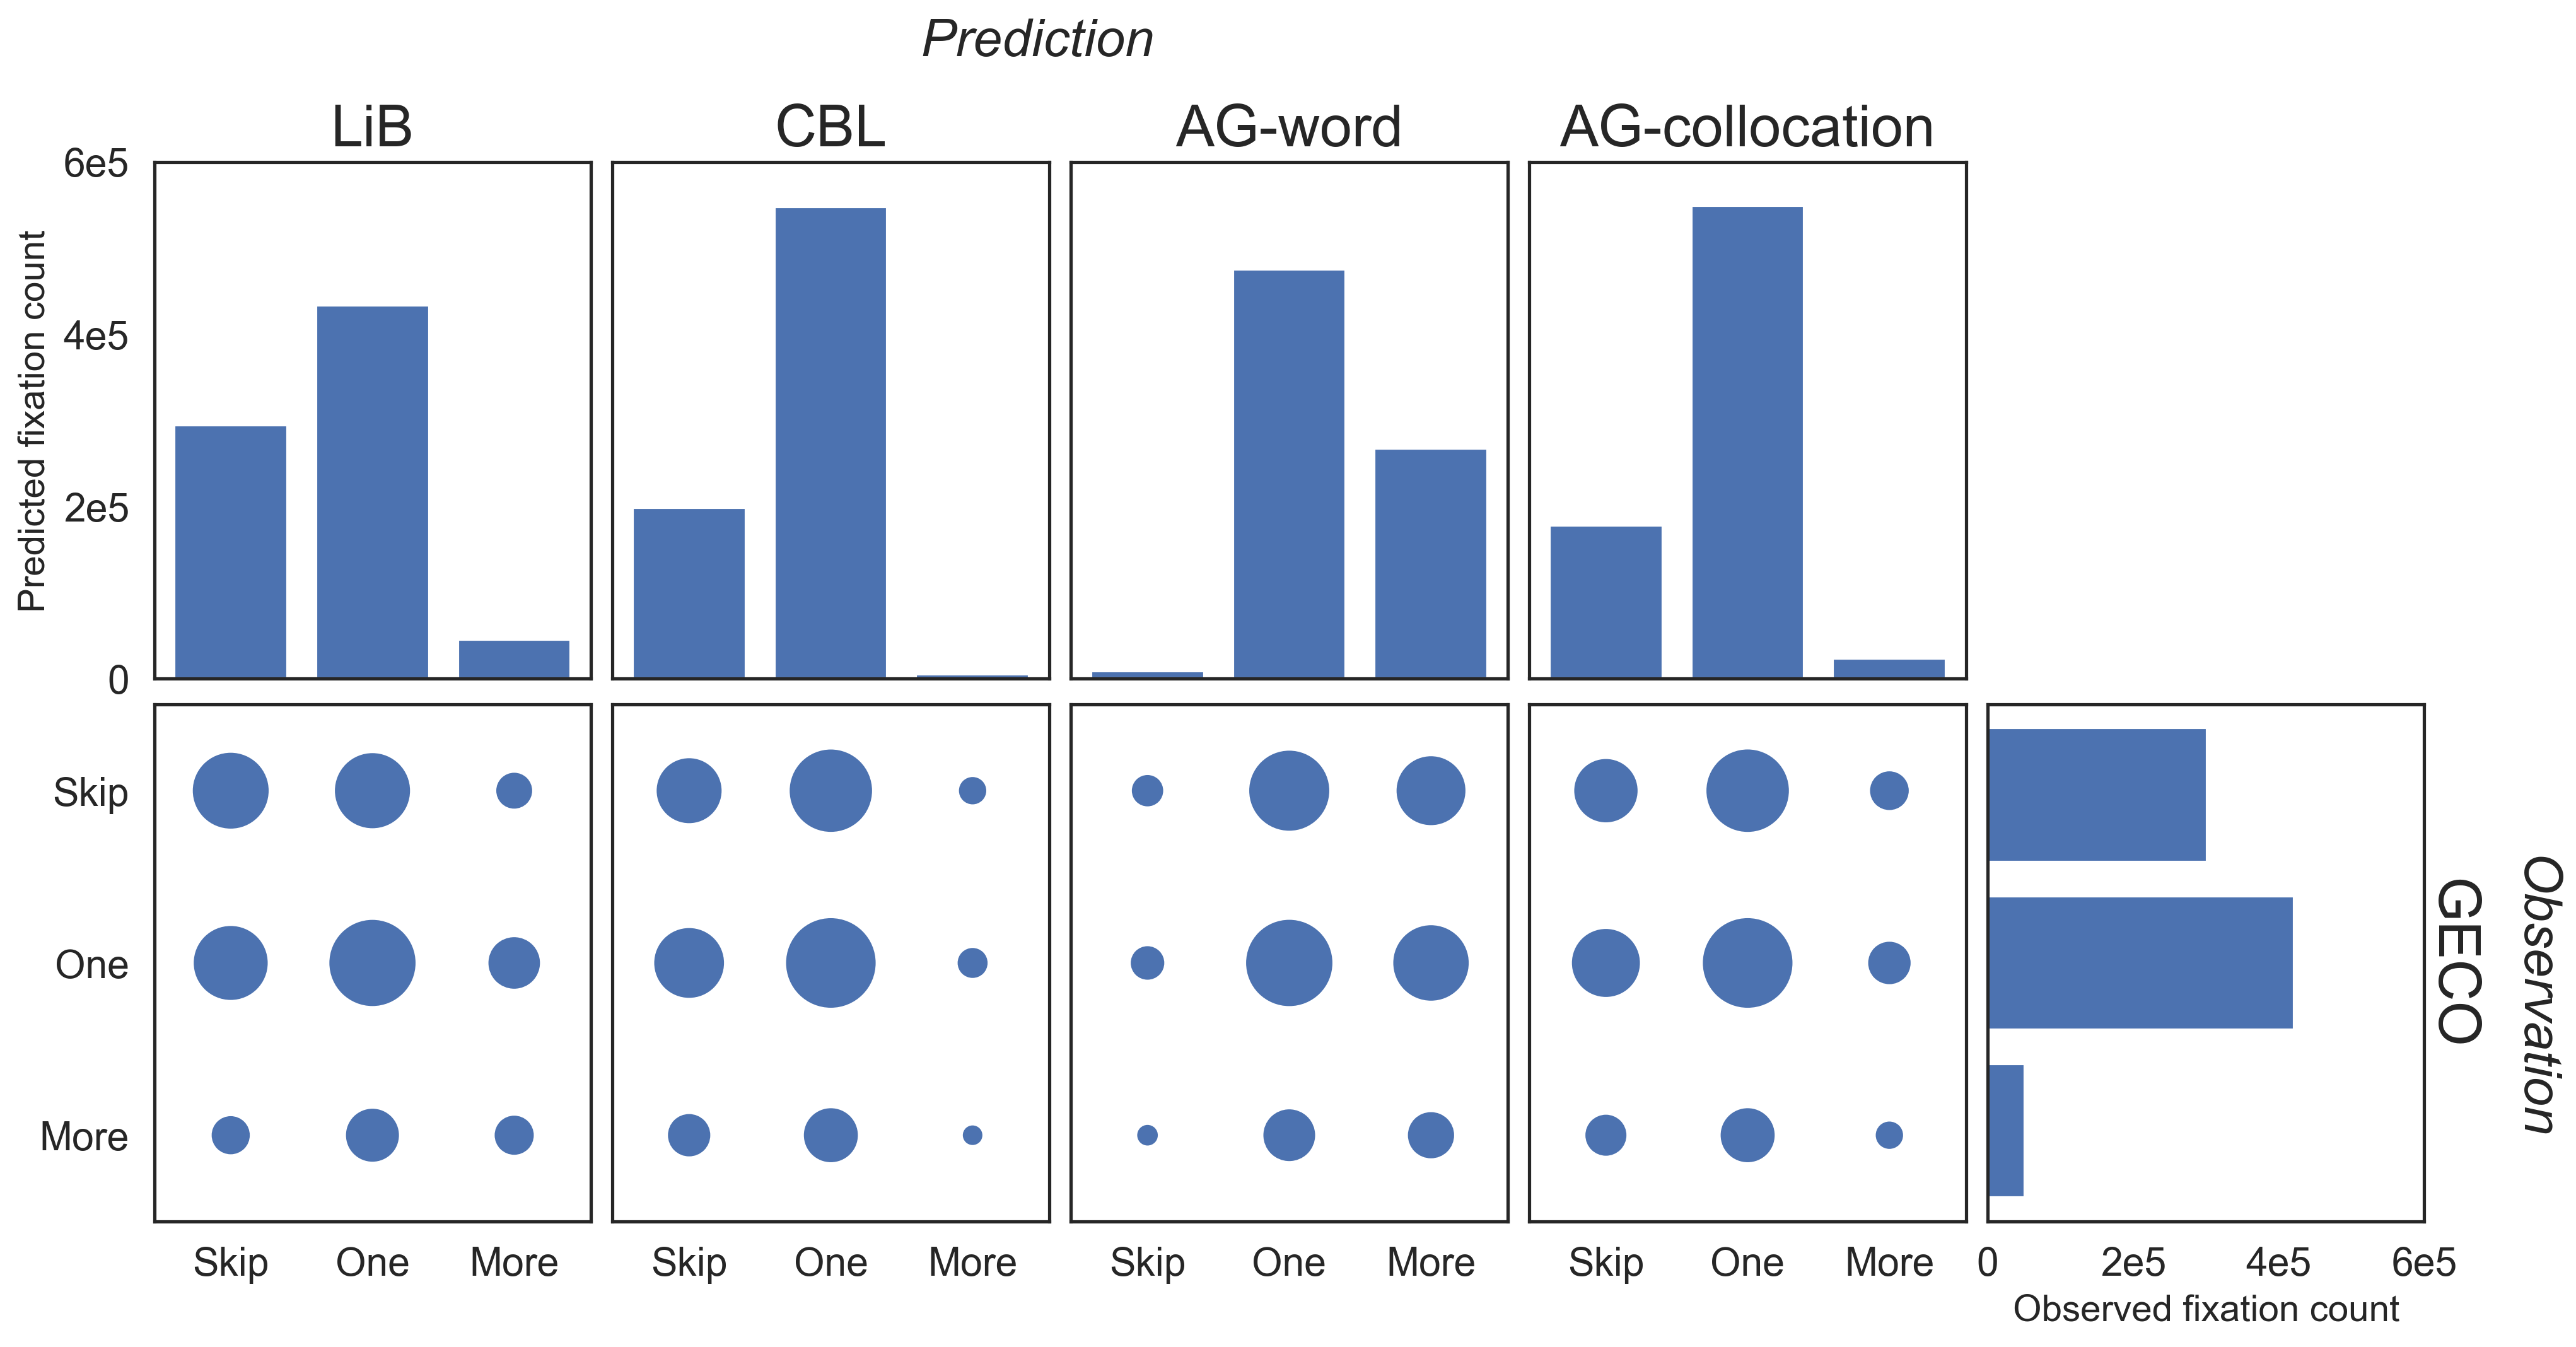

In [33]:
## English
%pylab inline

# start with a square Figure
fig = plt.figure(figsize=(15, 7), dpi=300)

gs = matplotlib.gridspec.GridSpec(ncols=5, nrows=2, figure=fig,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

for ind,name,predicted in zip(range(4), 
                              ['LiB','CBL','AG-word','AG-collocation'], 
                              [fixations_pred_en,fixations_cbl_en,fixations_w_ag_en,fixations_c_ag_en]):
    ax_model = fig.add_subplot(gs[0, ind])
    ax_fir = fig.add_subplot(gs[1, ind], sharex=ax_model)

    model_count = [sum([i==0 for i in predicted]),
            sum([i==1 for i in predicted]),
            sum([i>1 for i in predicted])]

    ax_model.bar(['Skip','One','More'],model_count)
    ax_model.set_ylim((0,600000))
    ax_model.set_title(name, fontsize=22)
    if ind == 0:
        ax_model.set_yticks([0. ,  200000 ,  400000 ,  600000])
        ax_model.set_yticklabels([0,'2e5','4e5','6e5'], fontsize=15)
        ax_model.set_ylabel('Predicted fixation count', fontsize=14)
    else:
        ax_model.set_yticks([])
    ax_model.set_xticklabels(['','',''], fontsize=0)
    
    data, ax  = fixations_real_first_en, ax_fir
    stats = dict()
    for f1,f0 in zip(predicted, data):
        f1, f0 = f1 if f1<2 else 2, f0 if f0<2 else 2
        
        # reversed y labels
        if f0 == 0:f0 = 2
        elif f0 == 2:f0 = 0
        
        if (f1, f0) in stats:
            stats[(f1, f0)] += 1
        else:
            stats[(f1, f0)] = 0
    f1 = [f1 for (f1, f0), v in stats.items()]
    f0 = [f0 for (f1, f0), v in stats.items()]
    N = [v**0.5*2 for (f1, f0), v in stats.items()]

    ax.set_ylim((-0.5,2.5))
    if ind == 0:
        ax.set_yticks([0. ,  1 ,  2])
        ax.set_yticklabels(['More','One','Skip'], fontsize=15)
    else:
        ax.set_yticks([])
        
    ax.set_xticklabels(['Skip','One','More'], fontsize=15)
    ax.scatter(f1,f0,sizes=N)

ax_fir_hist = fig.add_subplot(gs[1, 4])

name, data, ax = 'First-pass fixation', fixations_real_first_en, ax_fir_hist
count = [sum([i>1 for i in data]),
        sum([i==1 for i in data]),
        sum([i==0 for i in data])]
ax.barh(['More','One','Skip'], count)
ax.set_xlim((0,600000))

ax.set_xticks([0. ,  200000 ,  400000 ,  600000])
ax.set_xticklabels([0,'2e5','4e5','6e5'], fontsize=15)
ax.set_xlabel('Observed fixation count', fontsize=14)
ax.yaxis.set_label_position("right")
ax.set_ylabel('GECO', fontsize=22, rotation=-90, labelpad=20)
ax.set_yticks([])

fig.text(0.37, 0.98, 'Prediction', style='italic',fontsize=20,)
fig.text(0.93, 0.17, 'Observation', style='italic',fontsize=20, rotation=-90)

plt.show()

Populating the interactive namespace from numpy and matplotlib


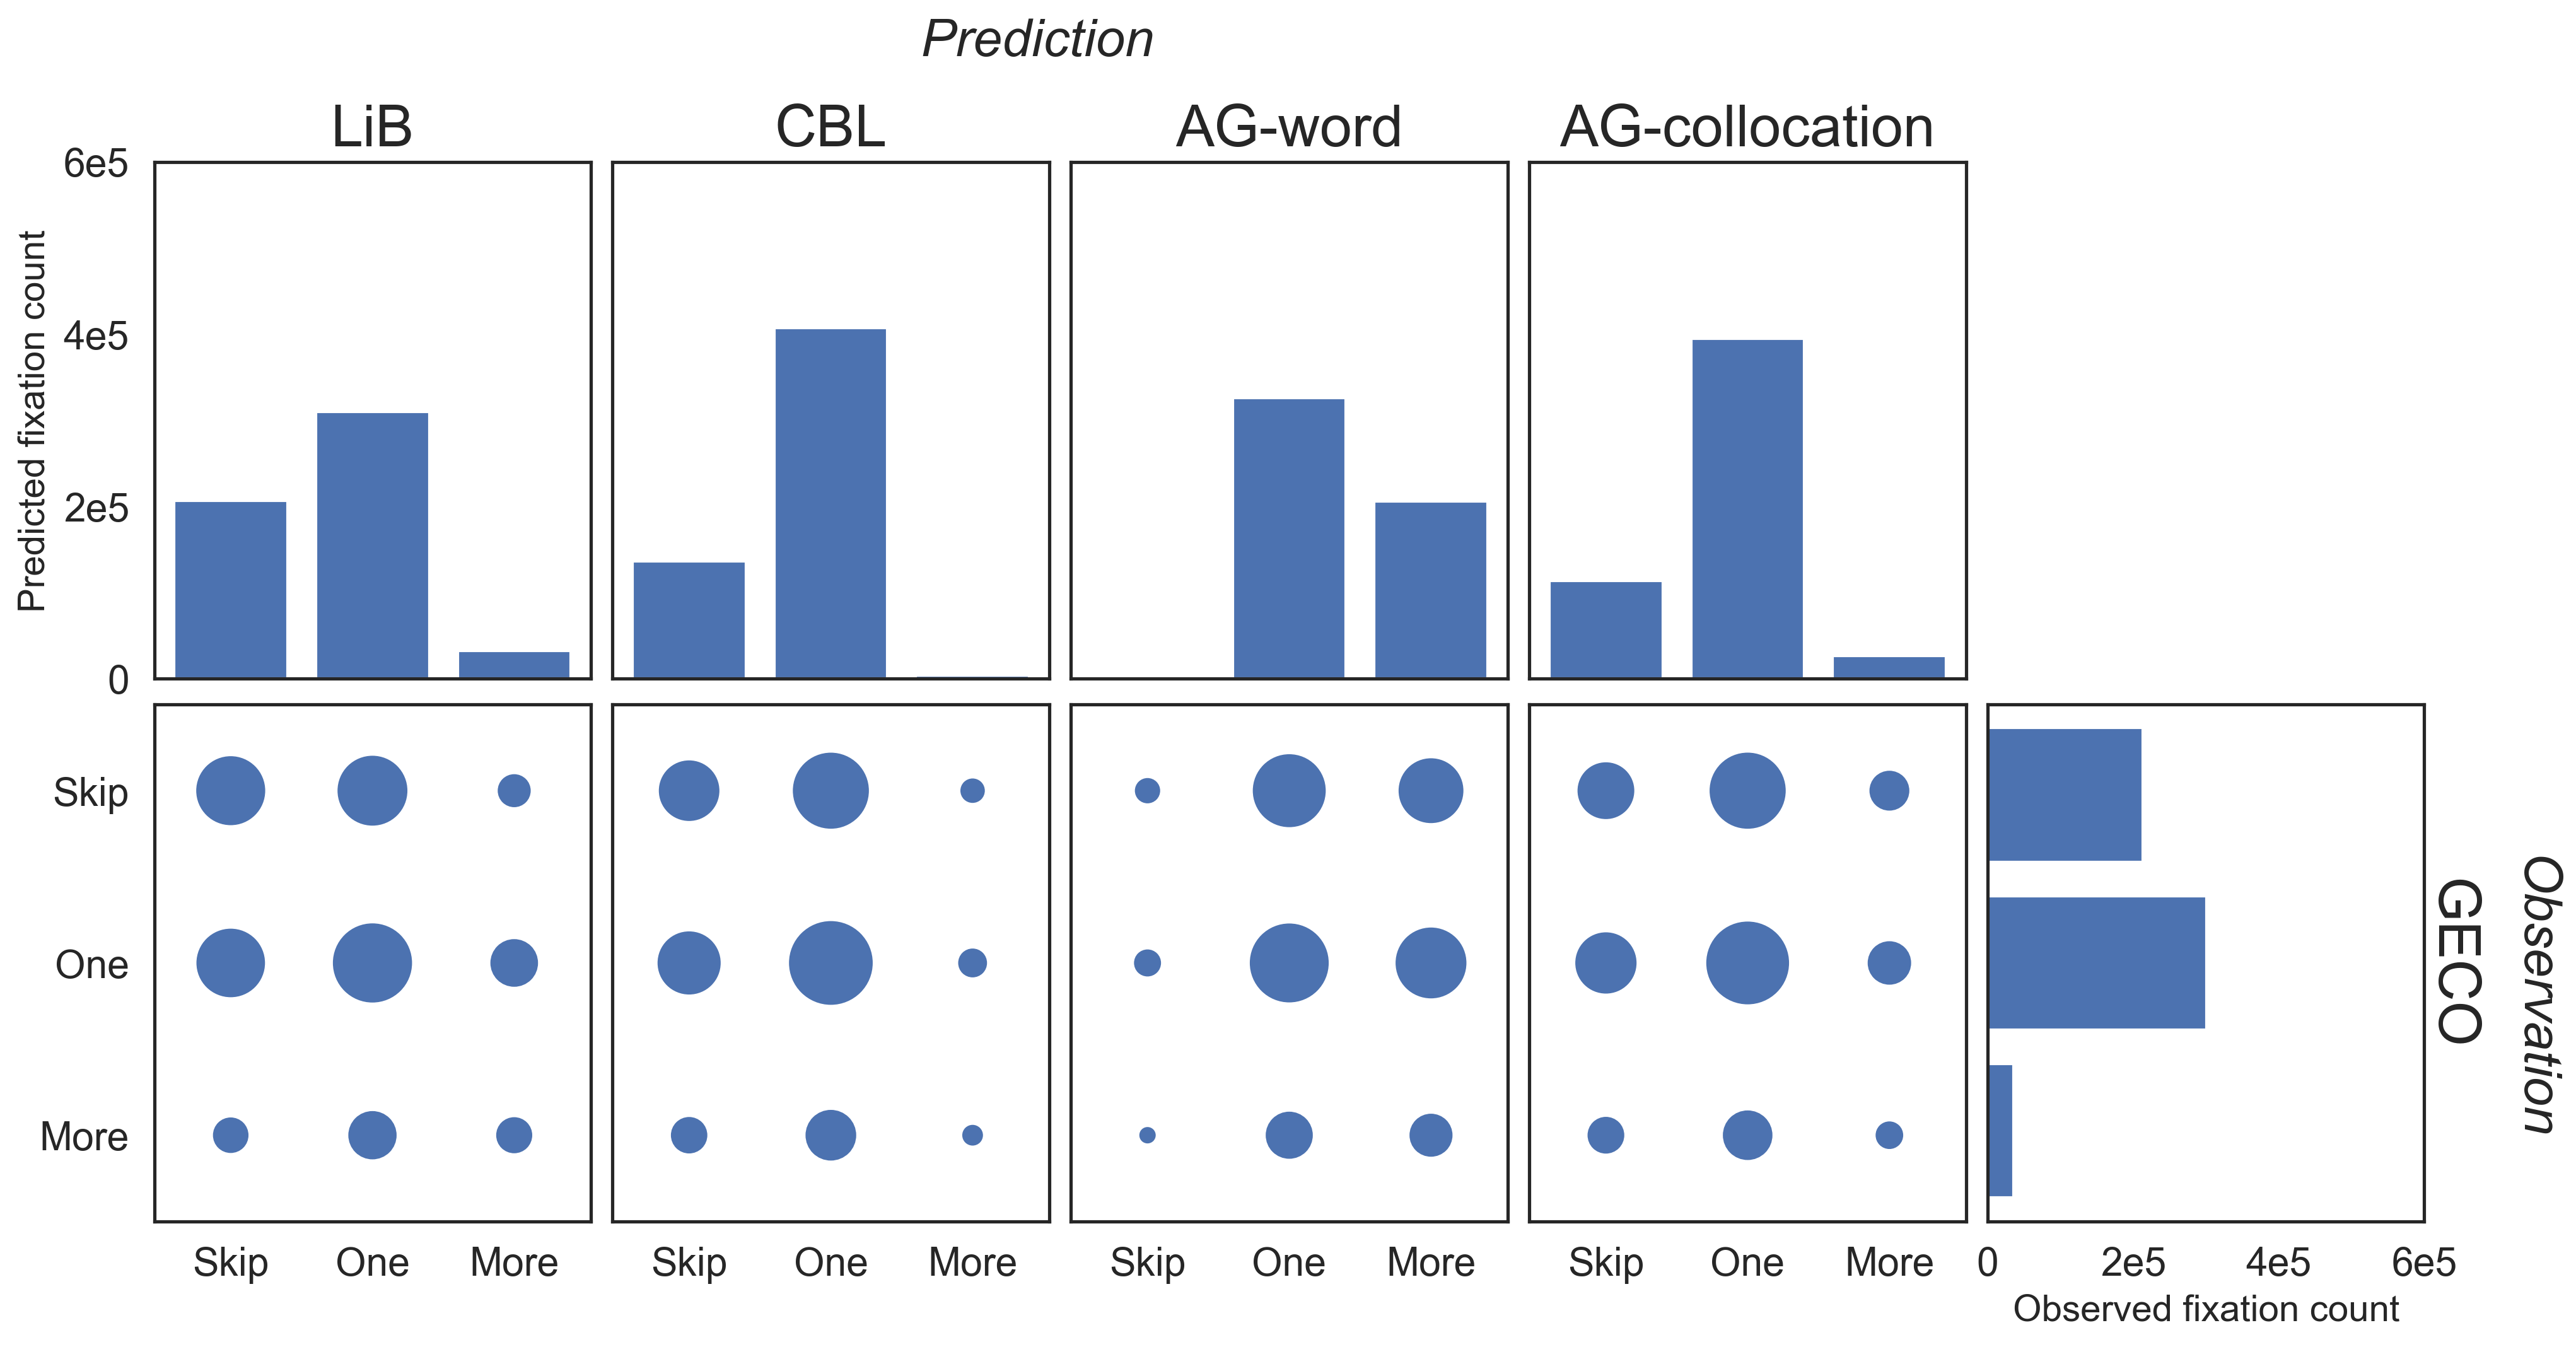

In [34]:
## Dutch
%pylab inline

# start with a square Figure
fig = plt.figure(figsize=(15, 7), dpi=300)

gs = matplotlib.gridspec.GridSpec(ncols=5, nrows=2, figure=fig,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

for ind,name,predicted in zip(range(4), 
                              ['LiB','CBL','AG-word','AG-collocation'], 
                              [fixations_pred_nl,fixations_cbl_nl,fixations_w_ag_nl,fixations_c_ag_nl]):
    ax_model = fig.add_subplot(gs[0, ind])
    ax_fir = fig.add_subplot(gs[1, ind], sharex=ax_model)

    model_count = [sum([i==0 for i in predicted]),
            sum([i==1 for i in predicted]),
            sum([i>1 for i in predicted])]

    ax_model.bar(['Skip','One','More'],model_count)
    ax_model.set_ylim((0,600000))
    ax_model.set_title(name, fontsize=22)
    if ind == 0:
        ax_model.set_yticks([0. ,  200000 ,  400000 ,  600000])
        ax_model.set_yticklabels([0,'2e5','4e5','6e5'], fontsize=15)
        ax_model.set_ylabel('Predicted fixation count', fontsize=14)
    else:
        ax_model.set_yticks([])
    ax_model.set_xticklabels(['','',''], fontsize=0)
    
    data, ax  = fixations_real_first_nl, ax_fir
    stats = dict()
    for f1,f0 in zip(predicted, data):
        f1, f0 = f1 if f1<2 else 2, f0 if f0<2 else 2
        
        # reversed y labels
        if f0 == 0:f0 = 2
        elif f0 == 2:f0 = 0
        
        if (f1, f0) in stats:
            stats[(f1, f0)] += 1
        else:
            stats[(f1, f0)] = 0
    f1 = [f1 for (f1, f0), v in stats.items()]
    f0 = [f0 for (f1, f0), v in stats.items()]
    N = [v**0.5*2 for (f1, f0), v in stats.items()]

    ax.set_ylim((-0.5,2.5))
    if ind == 0:
        ax.set_yticks([0. ,  1 ,  2])
        ax.set_yticklabels(['More','One','Skip'], fontsize=15)
    else:
        ax.set_yticks([])
        
    ax.set_xticklabels(['Skip','One','More'], fontsize=15)
    ax.scatter(f1,f0,sizes=N)

ax_fir_hist = fig.add_subplot(gs[1, 4])

name, data, ax = 'First-pass fixation', fixations_real_first_nl, ax_fir_hist
count = [sum([i>1 for i in data]),
        sum([i==1 for i in data]),
        sum([i==0 for i in data])]
ax.barh(['More','One','Skip'], count)
ax.set_xlim((0,600000))

ax.set_xticks([0. ,  200000 ,  400000 ,  600000])
ax.set_xticklabels([0,'2e5','4e5','6e5'], fontsize=15)
ax.set_xlabel('Observed fixation count', fontsize=14)
ax.yaxis.set_label_position("right")
ax.set_ylabel('GECO', fontsize=22, rotation=-90, labelpad=20)
ax.set_yticks([])

fig.text(0.37, 0.98, 'Prediction', style='italic',fontsize=20,)
fig.text(0.93, 0.17, 'Observation', style='italic',fontsize=20, rotation=-90)

plt.show()

# Lengths of different types of units 

Populating the interactive namespace from numpy and matplotlib


<ErrorbarContainer object of 3 artists>

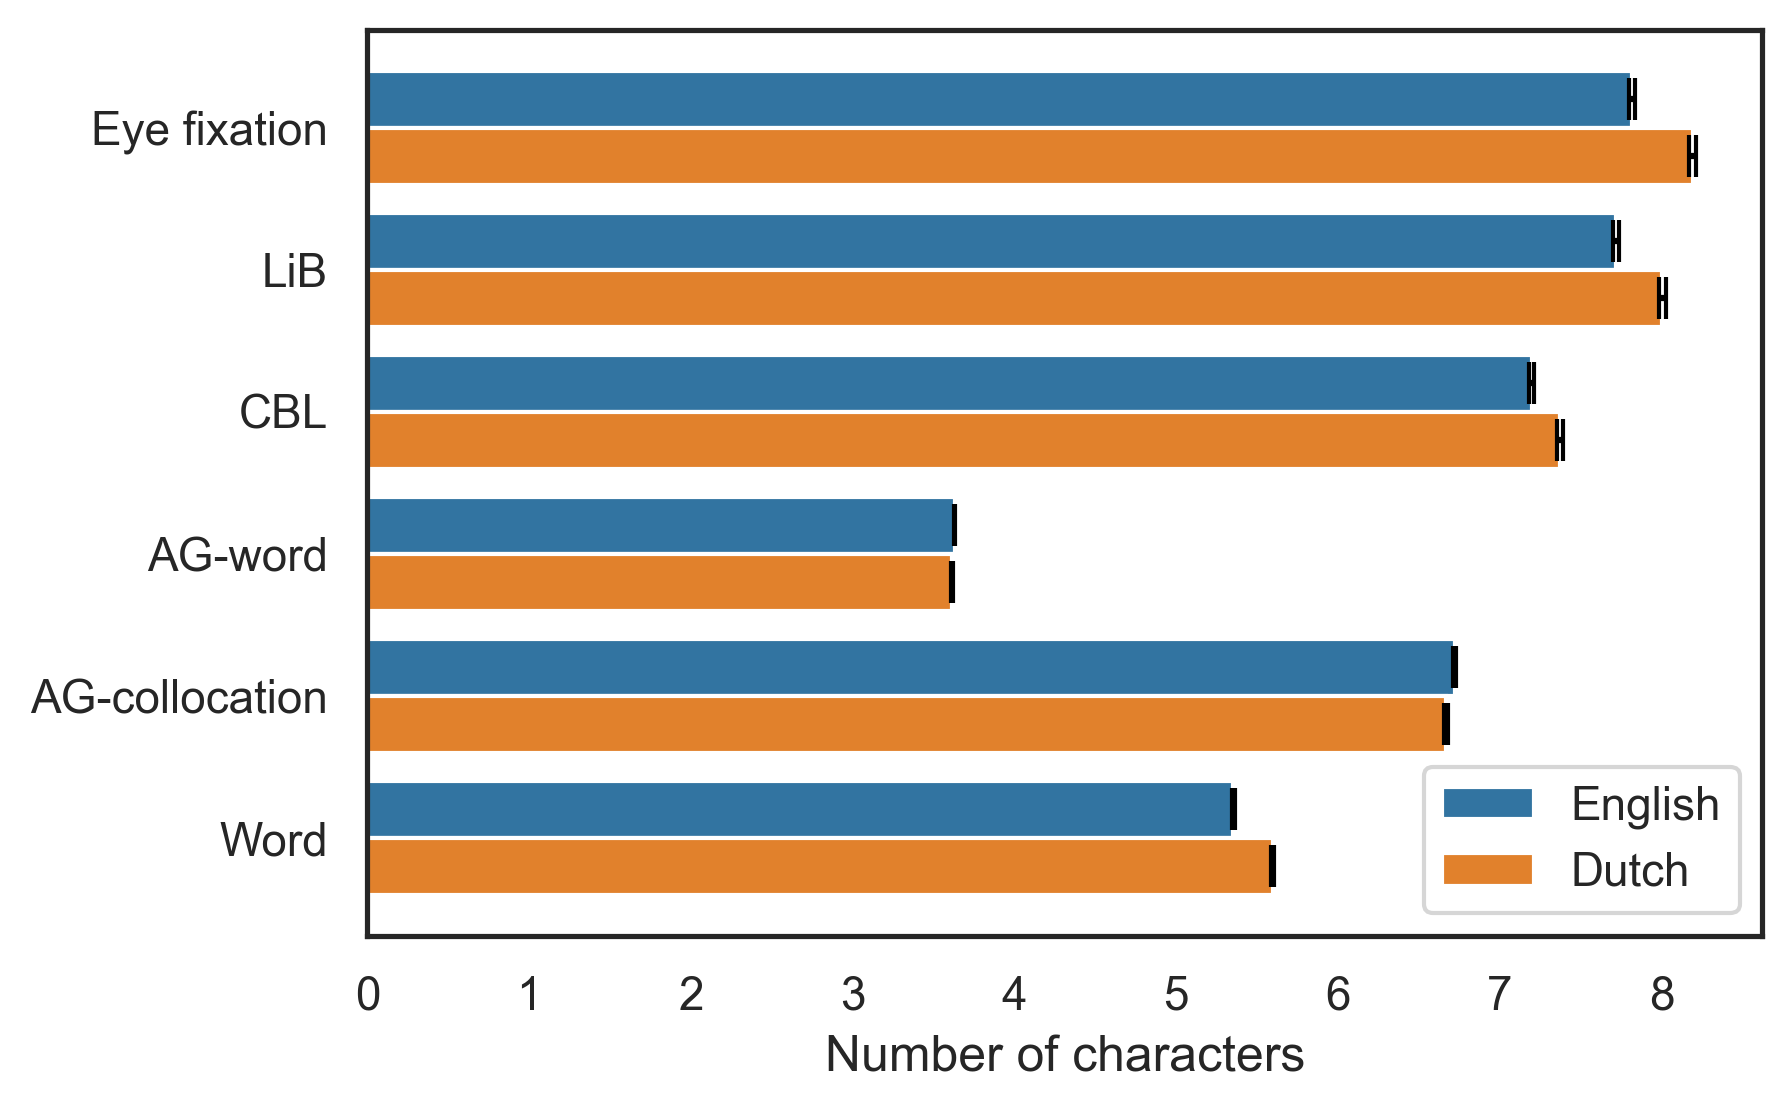

In [14]:
fig, ax = plt.subplots(dpi=300)
sns.set_theme(style="white")
# sns.set(font_scale=5)
sns.barplot(y=['Eye fixation','Eye fixation','LiB','LiB','CBL','CBL','AG-word','AG-word','AG-collocation','AG-collocation','Word','Word',],
            x=np.array([7.819, 8.192,7.718, 8.004, 7.198 , 7.372, 3.629, 3.614, 6.720, 6.670, 5.353, 5.596, ]), palette="tab10", ax=ax, hue=['English', 'Dutch','English', 'Dutch','English', 'Dutch','English', 'Dutch','English', 'Dutch','English', 'Dutch'],orient='h')
ax.set_xlabel('Number of characters')

# ax.errorbar(y=np.arange(0,6,0.5),x=[7.82, 8.19,7.72, 8.  , 6.9 , 7.37, 3.63, 3.61, 6.72, 6.67, 5.35, 5.6 , ], xerr=0.02)
ax.errorbar(y=-0.2,x=7.819, xerr=0.018,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=0.2,x=8.192, xerr=0.021,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=0.8,x=7.718, xerr=0.018,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=1.2,x=8.004, xerr=0.023,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=1.8,x=7.198, xerr=0.015,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=2.2,x=7.372, xerr=0.020,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=2.8,x=3.629, xerr=0.004,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=3.2,x=3.614, xerr=0.004,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=3.8,x=6.720, xerr=0.010,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=4.2,x=6.670, xerr=0.012,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=4.8,x=5.353, xerr=0.007,capsize=5,c='black', uplims=True,lolims=False)
ax.errorbar(y=5.2,x=5.596, xerr=0.009,capsize=5,c='black', uplims=True,lolims=False)

# Different limitations of unit length

In [6]:
importlib.reload(LiB)
model = LiB.model

'Define the train/test set'
corpus_train = sents_with_line_ends_without_repeat_en
corpus_test = sents_with_line_ends_without_repeat_en

'New and init a memory'
for i in range(5,31):
    print()
    print(i)
    m_geco_en_t = model(corpus_train, corpus_test, lexicon_in=0.25, lexicon_out=0.0001, update_rate=0.2, life=3)
    m_geco_en_t.logs['note'] = 0
    m_geco_en_t.max_len = i

    'RUN!!!'
    for epoch_id in range(0,10001):
        m_geco_en_t.run(epoch_id, article_length=200, test_interval=100);
        if epoch_id>0 and epoch_id % 100==0:
            if m_geco_en_t.logs['eval_index'][-1] > m_geco_en_t.logs['eval_index'][-2]:
                break
    f1 = m_geco_en_t.predict_eye_fixations(geco_res['mono'], show_length=True);


5
0	  MemLength: 551 3.4	  ChunkLength: 2.17	  EvalIndex: 4.203

100	  MemLength: 2415 4.5	  ChunkLength: 3.55	  EvalIndex: 3.165 Change:24.7%

200	  MemLength: 2742 4.5	  ChunkLength: 3.63	  EvalIndex: 3.144 Change:0.6%

300	  MemLength: 2839 4.5	  ChunkLength: 3.67	  EvalIndex: 3.123 Change:0.7%

400	  MemLength: 2907 4.5	  ChunkLength: 3.67	  EvalIndex: 3.131 Change:-0.3%

[Length] Word 5.353 Pred 3.674 Real 7.820	Model_SE 0.001 CI 0.003
[F1] Model 32.15 Word 38.32	
6
0	  MemLength: 551 3.4	  ChunkLength: 2.17	  EvalIndex: 4.192

100	  MemLength: 2692 4.8	  ChunkLength: 3.83	  EvalIndex: 2.975 Change:29.0%

200	  MemLength: 3072 4.9	  ChunkLength: 3.96	  EvalIndex: 2.924 Change:1.7%

300	  MemLength: 3281 4.9	  ChunkLength: 4.02	  EvalIndex: 2.904 Change:0.7%

400	  MemLength: 3411 4.9	  ChunkLength: 4.07	  EvalIndex: 2.885 Change:0.7%

500	  MemLength: 3526 5.0	  ChunkLength: 4.08	  EvalIndex: 2.887 Change:-0.1%

[Length] Word 5.353 Pred 4.080 Real 7.820	Model_SE 0.001 CI 0.004
[F

In [7]:
importlib.reload(LiB)
model = LiB.model

'Define the train/test set'
corpus_train = sents_with_line_ends_without_repeat_nl
corpus_test = sents_with_line_ends_without_repeat_nl

'New and init a memory'
for i in range(5,31):
    print()
    print(i)
    m_geco_nl_t = model(corpus_train, corpus_test, lexicon_in=0.25, lexicon_out=0.0001, update_rate=0.2, life=3)
    m_geco_nl_t.logs['note'] = 0
    m_geco_nl_t.max_len = i

    'RUN!!!'
    for epoch_id in range(0,10001):
        m_geco_nl_t.run(epoch_id, article_length=200, test_interval=100);
        if epoch_id>0 and epoch_id % 100==0:
            if m_geco_nl_t.logs['eval_index'][-1] > m_geco_nl_t.logs['eval_index'][-2]:
                break
    f1 = m_geco_nl_t.predict_eye_fixations(geco_res['L1'], show_length=True);


5
0	  MemLength: 606 3.8	  ChunkLength: 2.30	  EvalIndex: 4.012

100	  MemLength: 2356 4.6	  ChunkLength: 3.65	  EvalIndex: 3.068 Change:23.5%

200	  MemLength: 2614 4.5	  ChunkLength: 3.72	  EvalIndex: 3.052 Change:0.5%

300	  MemLength: 2925 4.7	  ChunkLength: 3.78	  EvalIndex: 3.048 Change:0.2%

400	  MemLength: 2974 4.7	  ChunkLength: 3.79	  EvalIndex: 3.041 Change:0.2%

500	  MemLength: 2930 4.5	  ChunkLength: 3.80	  EvalIndex: 3.030 Change:0.3%

600	  MemLength: 3061 4.6	  ChunkLength: 3.82	  EvalIndex: 3.034 Change:-0.1%

[Length] Word 5.596 Pred 3.818 Real 8.194	Model_SE 0.001 CI 0.004
[F1] Model 31.27 Word 38.68	
6
0	  MemLength: 608 3.8	  ChunkLength: 2.38	  EvalIndex: 3.888

100	  MemLength: 2817 5.0	  ChunkLength: 3.93	  EvalIndex: 2.918 Change:24.9%

200	  MemLength: 3028 4.9	  ChunkLength: 4.02	  EvalIndex: 2.874 Change:1.5%

300	  MemLength: 3290 5.1	  ChunkLength: 4.08	  EvalIndex: 2.865 Change:0.3%

400	  MemLength: 3431 5.1	  ChunkLength: 4.11	  EvalIndex: 2.855 Chan

16.0 13.0
53.84 53.16


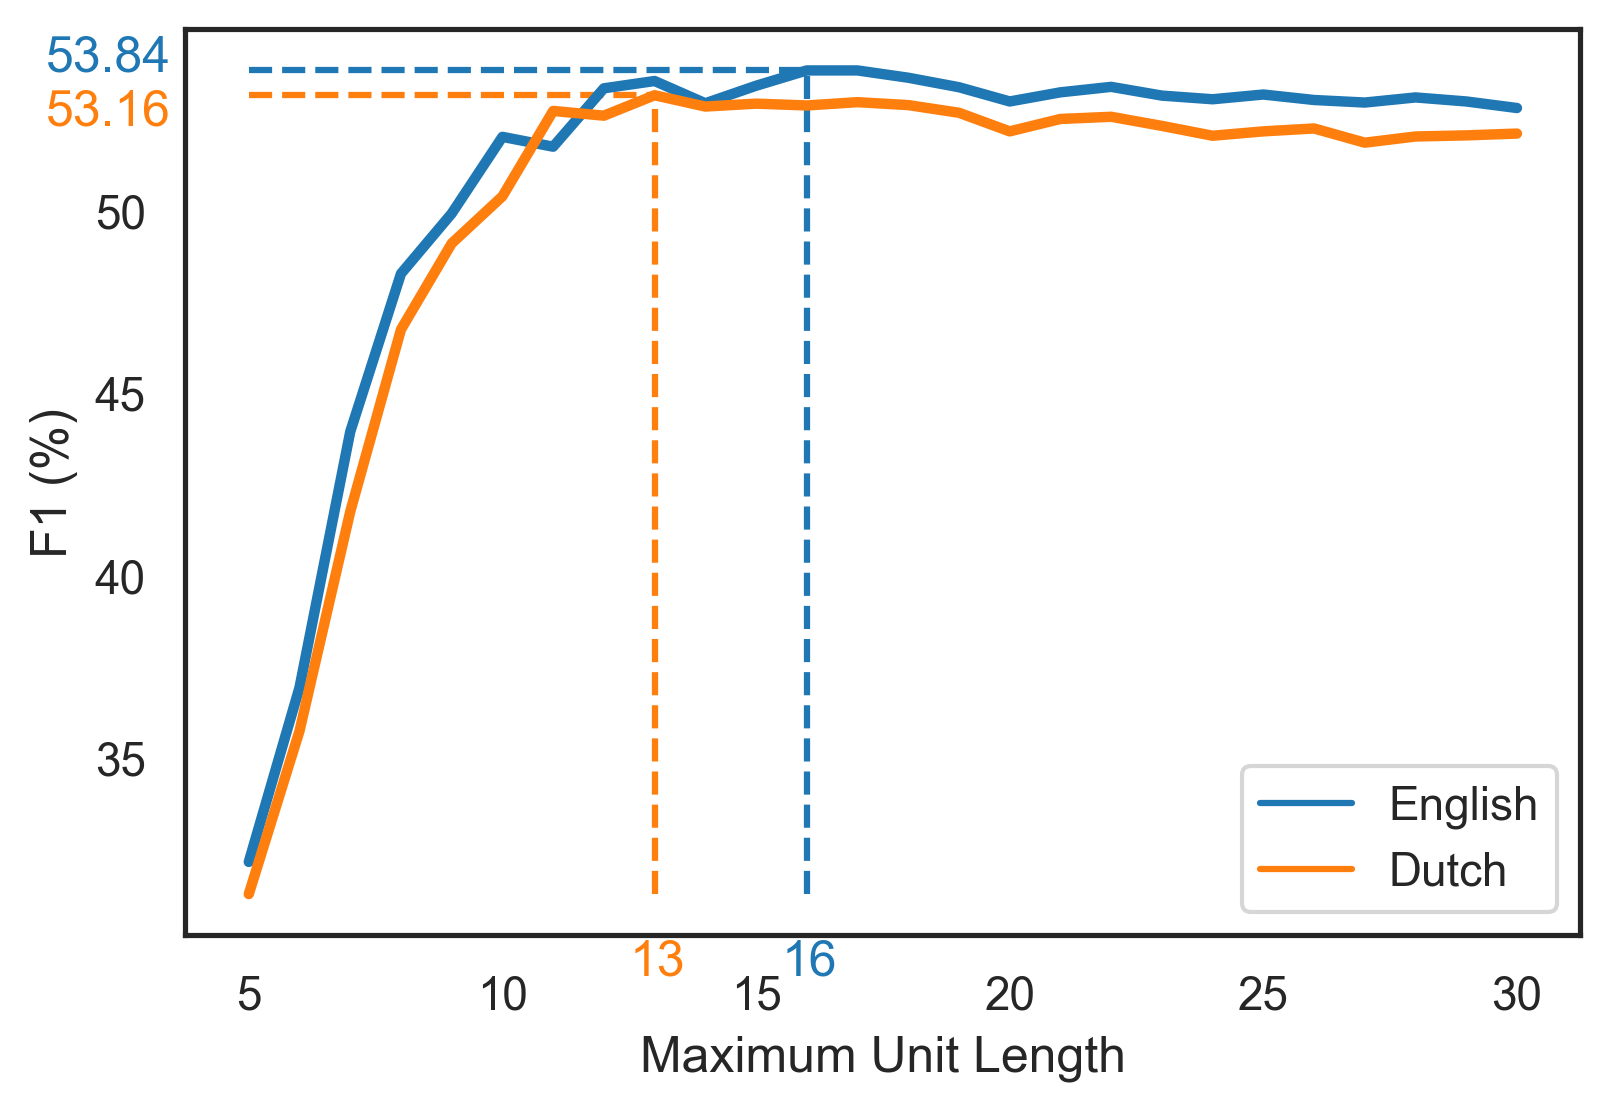

In [15]:
diff_lim_en = np.array([[5,3.674,32.15],
    [6,4.080,36.93],
    [7,4.631,43.94],
    [8,5.066,48.27],
    [9,5.317,49.92],
    [10,5.730,52.02],
    [11,5.707,51.75],
    [12,6.227,53.35],
    [13,6.380,53.55],
    [14,6.238,52.94],
    [15,6.557,53.42],
    [16,6.869,53.84],
    [17,7.125,53.84],
    [18,7.125,53.64],
    [19,7.076,53.38],
    [20,6.757,52.99],
    [21,7.045,53.24],
    [22,7.238,53.39],
    [23,7.026,53.15],
    [24,7.021,53.05],
    [25,6.902,53.18],
    [26,7.035,53.03],
    [27,7.033,52.96],
    [28,7.186,53.10],
    [29,7.099,52.99],
    [30,6.720,52.81]])
diff_lim_nl = np.array([[5,3.818,31.27],
    [6,4.149,35.74],
    [7,4.612,41.75],
    [8,5.199,46.74],
    [9,5.576,49.10],
    [10,5.825,50.39],
    [11,6.444,52.73],
    [12,6.486,52.60],
    [13,6.840,53.16],
    [14,6.833,52.85],
    [15,6.993,52.93],
    [16,7.228,52.88],
    [17,7.398,52.97],
    [18,7.708,52.89],
    [19,7.571,52.68],
    [20,7.188,52.17],
    [21,7.832,52.51],
    [22,7.983,52.57],
    [23,8.651,52.32],
    [24,7.224,52.05],
    [25,8.027,52.17],
    [26,8.013,52.25],
    [27,8.843,51.86],
    [28,8.390,52.03],
    [29,8.133,52.06],
    [30,7.971,52.11]])

scores = pd.DataFrame(np.array([diff_lim_en[0:,2], diff_lim_nl[0:,2]]), columns=diff_lim_en[0:,0].astype(int), index=['English', 'Dutch']).T

fig, ax = plt.subplots(dpi=300)
sns.set_theme(style="white")
sns.lineplot(data=scores, palette="tab10", linewidth=2.5, ax=ax, dashes=False)
ax.hlines(diff_lim_en[0:,2].max(),diff_lim_en[0,0],diff_lim_en[0,0]+np.argmax(diff_lim_en[0:,2]), color='#1f77b4',linestyles='dashed')
ax.hlines(diff_lim_nl[0:,2].max(),diff_lim_nl[0,0],diff_lim_nl[0,0]+np.argmax(diff_lim_nl[0:,2]), color='#ff7f0e',linestyles='dashed')
ax.vlines(diff_lim_en[0,0]+np.argmax(diff_lim_en[0:,2]), diff_lim_nl[0,2], diff_lim_en[0:,2].max(), color='#1f77b4',linestyles='dashed')
ax.vlines(diff_lim_nl[0,0]+np.argmax(diff_lim_nl[0:,2]), diff_lim_nl[0,2], diff_lim_nl[0:,2].max(), color='#ff7f0e',linestyles='dashed')

ax.text(1, diff_lim_en[0:,2].max(), diff_lim_en[0:,2].max(), color='#1f77b4')
ax.text(1, diff_lim_nl[0:,2].max()-0.8, diff_lim_nl[0:,2].max(), color='#ff7f0e')
ax.text(diff_lim_en[0,0]+np.argmax(diff_lim_en[0:,2])-0.5, diff_lim_nl[0,2]-2.2, '16', color='#1f77b4')
ax.text(diff_lim_nl[0,0]+np.argmax(diff_lim_nl[0:,2])-0.5, diff_lim_nl[0,2]-2.2, '13', color='#ff7f0e')

# ax.arrow(diff_lim_en[0,0]+np.argmax(diff_lim_en[0:,2]), diff_lim_en[0:,2].max()-5, 0, 5, color='#1f77b4', head_width=1, width=0.5, length_includes_head=True)
# ax.arrow(diff_lim_nl[0,0]+np.argmax(diff_lim_nl[0:,2]), diff_lim_nl[0:,2].max()-5, 0, 5, color='#ff7f0e', head_width=1, width=0.5, length_includes_head=True)
ax.set_xlabel('Maximum Unit Length')
ax.set_ylabel('F1 (%)')
print(diff_lim_en[0,0]+np.argmax(diff_lim_en[0:,2]),diff_lim_nl[0,0]+np.argmax(diff_lim_nl[0:,2]))
print(diff_lim_en[0:,2].max(),diff_lim_nl[0:,2].max())